Name: Gurjeet Singh

#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the Fashion Minst dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: Fashion MNIST dataset

We will use the Fashion MNIST dataset, a dataset of Zalando's articles. Each sample is a 28x28 pixels grayscale image, associated with a label from 10 classes:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Each pixel intensity is represented by a uint8 (byte) from 0 to 255.
We will divide the dataset in training, validation and test set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of the deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one). Therefore we use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims) to transform each image from a matrix to a 3-dimensional tensor. Finaly we have to normalize the input data.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


4423680/4422102 [==============================] - 0s 0us/step


Let's take a look at a sample of the images in the dataset:

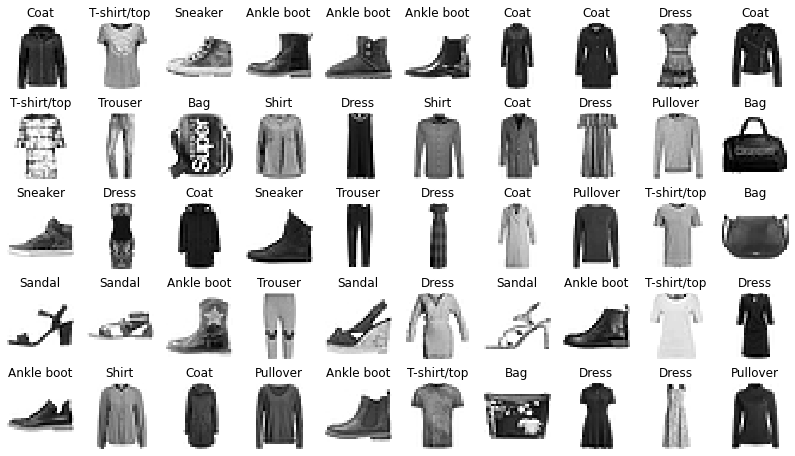

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

mu_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)
X_train = (X_train - mu_train)/std_train  #[TO COMPLETE]
X_valid = (X_valid - mu_train)/std_train  #[TO COMPLETE]
X_test = (X_test - mu_train)/std_train    #[TO COMPLETE]


#Add one dimension to manage the channel
X_train=tf.expand_dims(X_train, 3) 
X_valid=tf.expand_dims(X_valid, 3) 
X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
430/430 [==============================] - 34s 5ms/step - loss: 1.0100 - accuracy: 0.6846 - val_loss: 0.5205 - val_accuracy: 0.8222
Epoch 2/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4958 - accuracy: 0.8286 - val_loss: 0.4475 - val_accuracy: 0.8492
Epoch 3/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4411 - accuracy: 0.8478 - val_loss: 0.4153 - val_accuracy: 0.8634
Epoch 4/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4042 - accuracy: 0.8606 - val_loss: 0.3931 - val_accuracy: 0.8706
Epoch 5/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3857 - accuracy: 0.8649 - val_loss: 0.3816 - val_accuracy: 0.8726
Epoch 6/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3690 - accuracy: 0.8731 - val_loss: 0.3708 - val_accuracy: 0.8750
Epoch 7/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3576 - accuracy: 0.8734 - val_loss: 0.3620 - val_accuracy: 0.8812
Epoch

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 0s - loss: 0.3632 - accuracy: 0.8714
accuracy: 87.14%


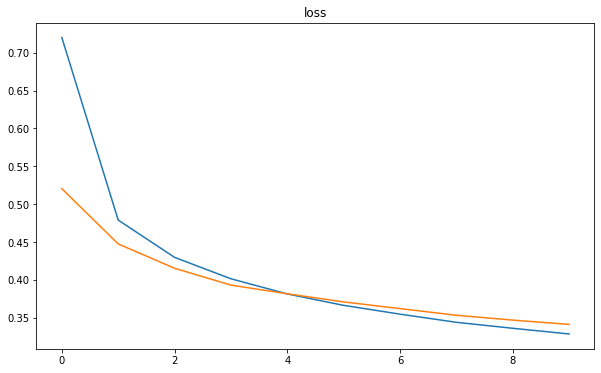

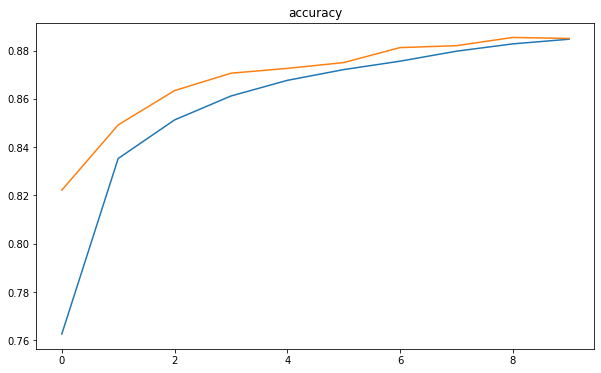

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

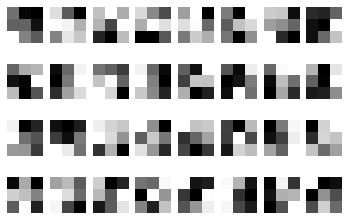

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
____________________________________________________

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1. The number of parameters are determined in our case with the shared parameter strategy. Hence for **each** filter the weights are shared among the neurons of the previous layer, and they just depends on the filter/kernel size and depth/channel of the input. Hence we have that the total parameters in a layer are: $$Par = (K_w * K_h * D + 1\, bias) * N_{filters}$$ \\
Where the $K$ is the kernel size and $D$ the depth or the so called channel numbers.
Hence we have that:
  

*   $Par_1 = (3 * 3 * 1 + 1) * 32 = 320 $
*   $Par_1 = (2 * 2 * 32 + 1) * 16 =  2064 $


2. The reasons that the two convolutional layers have two different parameters are due to the different **number of channels** (from 1 to 32) present in the input of the convolution, **kernel size** (from 3 to 2) and **number of filters** (from 32 to 16) present within the layer. Hence the main impact for this case is due to the number of channels.

Let's now train our deep CNN.

Epoch 1/10
430/430 [==============================] - 2s 5ms/step - loss: 1.4876 - accuracy: 0.5052 - val_loss: 0.6590 - val_accuracy: 0.7664
Epoch 2/10
430/430 [==============================] - 2s 4ms/step - loss: 0.6394 - accuracy: 0.7704 - val_loss: 0.5592 - val_accuracy: 0.8068
Epoch 3/10
430/430 [==============================] - 2s 4ms/step - loss: 0.5455 - accuracy: 0.8053 - val_loss: 0.5060 - val_accuracy: 0.8248
Epoch 4/10
430/430 [==============================] - 2s 4ms/step - loss: 0.5021 - accuracy: 0.8223 - val_loss: 0.4963 - val_accuracy: 0.8234
Epoch 5/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4658 - accuracy: 0.8350 - val_loss: 0.4896 - val_accuracy: 0.8378
Epoch 6/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4426 - accuracy: 0.8444 - val_loss: 0.4545 - val_accuracy: 0.8440
Epoch 7/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4274 - accuracy: 0.8504 - val_loss: 0.4175 - val_accuracy: 0.8608
Epoch 

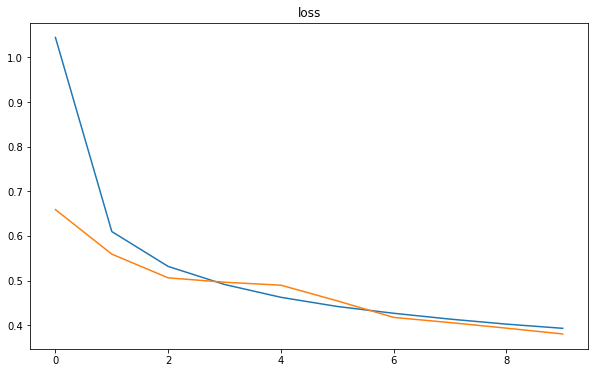

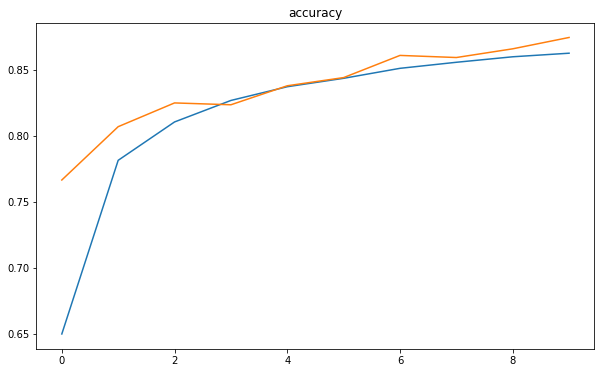

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 10, 10, 64)        8256      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)              

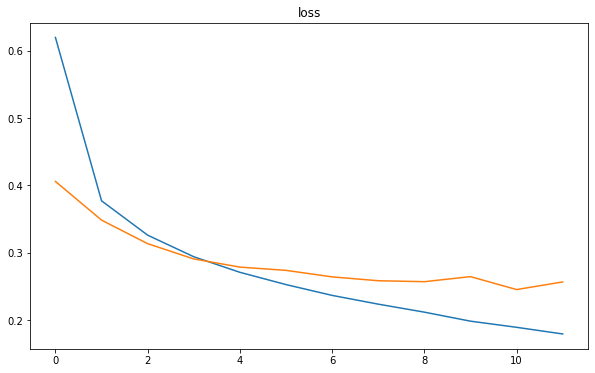

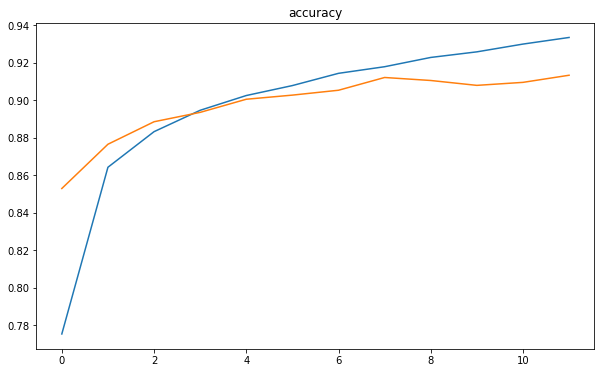

In [ ]:
#[TO COMPLETE]
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=[5,5], activation='relu', input_shape=[28, 28,1]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
  ])

optimizer = keras.optimizers.SGD(0.01, momentum = 0.9, nesterov = True)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
print(model.summary())
history = model.fit(X_train, y_train, epochs=12, batch_size=125,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found is a CNN made by **three Convolutional** and **two Max Pool** layers. In the convolutional layers a combination of **5, 3, 2 kernel size**  have been used with respect of each layer. **Number of filter** have been increased and rispectely assigned as **16, 32, 64**. Finally two fully connected network with non linear activation layers were added. The former with **32 neurons** and a **RELU** activation function, instead the latter one with **10** neurons with **softmax** activation to normalize the output into the 10 categorical Zalando classes. For best optimize the convergence rate an SCG optimizer has been used with learning rate 0.01, momentum 0.9 with Nesterov method. The epochs used by the model is 12.

The achieved accuracy in the test set is 90.40%.

Discussion:

The final model was achieved by changing **one by one** each hyperparameter, **every change was tested on training, validation and test set**.
The model has been increased in complexity from the given 2-CNN as in the accuracy and loss plots the simple model does not show results of overfitting, hence by exploring the hyperparameters and the learning convergence the model could perform better. Furthermore, it can be see that the given 2-CNN simple model does not show particular bias problems, since in the validation set it performs an overall good performance and loss values keep decreasing in the epochs, hence the model keeps learning. But we can see that from the metrics results the model could still learn and perform better as loss values keep decreasing in epoch for both dataset. 

The first change made in the architecture was to add a new convolutional layer before the first MaxPool. In this way, the first two convolutions are stacked on each other in order to develop more key points and feature extractions from the images, and furtherly a pool technique will be applied to summarize the receptive field learned in the first two layers.
By applying these new changes it was more visible than before that the convergence rate needed to be improved, hence Heavy ball and Nesterov techniques have been added into the optimizer to increase and speed up the converging rate, for finding a better minima of the cost function.
After these steps different combinations of filter numbers and kernel size were also explored and monitored with accuracy and loss plots to find the optimum ones. This step, again, allowed to improve the accuracy of the model.
Lately a new fully connected Relu activation layer with different neurons combination were added and tested to improve its performances and solve some overfitting issues, hence by calibrating these hyperparameter was possibile to minimize the gap of training and validation error.
In the end other few little changes were made again with learning rate, nesterov parameters and epoch values to find the final values of the optimizer and gradient search.

The final result achieved by the model has improved aproximately more than 5% of accuracy of the given basic model. Furthermore, achieving aproximately the 90% (and a little bit more)of accuracy I in the test set is the maximum result that can be achieved by using a simple CNN, as the Zalando's benchmark does show. Better results could be reached by exploring other more sophisticate technique like: Resnet, DenseNet and other complexd techniques which could also involve augmentation data.

Besides, I tested also other models: 

|Model | L1 | L2 | L3 | L4 | L5 |L6 | L7 | L8 | Optimizer | Epoch | Loss | Acc|
| --- | --- | --- | ---|--- | ---|---| ---| ---| ---|---| ---| ---| 
| M1 | Conv2D (32, [3,3] , relu) | Conv2D (32, [3,3] , relu) | Maxpool2D [2,2] | Conv2D (32, [3,3] , relu)| Maxpool2D [2,2] |Flatten| Dense(10, softmax) | | SGD(0.01) | 10 | Tr = 0.4180, Vl = 0.4060|  Tr: 0.8523, Vl: 0.8576|
| M2 | Conv2D (32, [3,3] , relu) | Conv2D (32, [3,3] , relu) | Maxpool2D [2,2] | Conv2D (32, [3,3] , relu)| Maxpool2D [2,2]| Flatten| Dense(10, softmax) | | **SGD(0.01, mom=0.9, nesterov=True)** | 10 | Tr = 0.2647, Vl = 0.3105|  Tr: 0.9048, Vl: 0.8896|Flatten
| M3 | Conv2D (32, [3,3] , relu) |  Maxpool2D [2,2]| Conv2D (32, [3,3] , relu) | **Maxpool2D [2,2]** | Conv2D (32, [3,3] , relu)| Maxpool2D [2,2]| Flatten| Dense(10, softmax) |SGD(0.01, mom=0.9, nesterov=True) | 10 | Tr = 0.3149, Vl = 0.3409|  Tr: 0.8855, Vl: 0.8750|
| M4 | Conv2D (32, [3,3] , relu) | Conv2D (32, [3,3] , relu) | Maxpool2D [2,2]| Conv2D (32, [3,3] , relu)| Maxpool2D [2,2]| Flatten| Dense(10, softmax) | **Dense(50, relu)**| SGD(0.01, mom=0.9, nesterov=True) | 10 | Tr = 0.2511, Vl = 0.2729|  Tr: 0.9075, Vl: 0.8992|
| M5 | Conv2D (32, **[5,5]** , relu) | Conv2D (32, [3,3] , relu) | Maxpool2D [2,2]| Conv2D (32, [3,3] , relu) | Maxpool2D [2,2] | Flatten| Dense(10, softmax) | Dense(50, relu)| SGD(0.01, mom=0.9, nesterov=True) | 10 | Tr = 0.3014, Vl = 0.2832|  Tr: 0.9153, Vl: 0.8990|
| **Mfinal** | Conv2D (**16**, [5,5] , relu) | Conv2D (32, [3,3] , relu) | Maxpool2D [2,2]| Conv2D (64, [3,3] , relu)| Maxpool2D [2,2] | Flatten| Dense(10, softmax) | Dense(50, relu)| SGD(0.01, mom=0.9, nesterov=True) | 12 | Tr = 0.1767, Vl = 0.2566|  Tr: 0.9346, Vl: 0.9134|

Discussion:

As mentioned in the previous  all the hyperparameters were changed and tested one by one, by increasing the complexity of the model step by step until finding the best one.

Some particular settings were not enhancing at all the results, they were even decreasing the accuracy (and increasing loss values) in validation set from the previous built model. For example from the Model 2 to Model 3 Maxpool layers were set after each convolution layer, which implies to reduce and summarize the receptive field of the layer. Hence Model 3 resulted to dicreasing its accuracy.

Instead some other changes were raising some little bit of overfitting issues like increasing the number of neurons in the fully connected neurons, increasing the epochs number, learning rate or increamenting the number of filters (Model 3, Model 2). Overfitting issues were evaluated from the learning behaviour of the model by looking not just at the final values of loss and accuracy but also at the overall learning and if the model in the end was showing a possible increment of loss values hence overfitting problems.

From the above table we can see that after increasing the complexity of the first model (M1) (by adding a convolution layer to explore more features) a speed up in the learning was required hence SGD has been parametrized with nesterov and momentum technique.

Finally from the M3 to M4 (final) model filter numbers were changed and ordered(ascendic order) to solve the little overfitting problem, which resulted not just to solve the overfitting problem but also to improve a little bit the accuracy of the model and last but not least epoch were increased by two units and early stopping then was applied to not face again the last overfitting issue.